In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing


In [5]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
df = pd.DataFrame(data.data)
df.head(1)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23


In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [11]:
data.target_names

['MedHouseVal']

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [14]:
scaled_df = scaler.fit_transform(df)
pd.DataFrame(scaled_df, columns=data.feature_names).head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df, data.target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [19]:
input_shape = (X_train.shape[1], )
input_shape

(8,)

In [21]:
# input shape -trebuie sa fie tuplu

In [20]:
model = tf.keras.Sequential(
    [
        ## INCEPUT-ul -> INPUT -> neschimbabil
        tf.keras.Input(shape=input_shape ),

        ### Nr de neuroni se poate ajusta
        ### BEST PRACTICE pt ACTIVATION FUNCTION este relu - este cea mai buna alegere de inceput
        tf.keras.layers.Dense(64, activation='relu'),

        ## Nr de neuroni per layer -> avem diferite tactici
        ## EX: injumatarire per layer
        ## Intuitie: Nu ar da un rezultat foarte bun 100 la 1
        tf.keras.layers.Dense(32, activation='relu'),


        ## SFARSIT-ul -> OUTPUT -> neschimbabil
        tf.keras.layers.Dense(1), # output -> ['MedHouseVal']
    ]
)

In [22]:
model.compile(
    loss=tf.keras.losses.mae,    ## Mean Absolute Error
    optimizer=tf.keras.optimizers.Adam(), ### Adaptive Moment Estimation - ### BEST PRACTICE pt optimizer
    metrics=['mae']
)

In [23]:
history = model.fit(X_train, y_train, epochs=100,  batch_size=32, validation_split=0.2)
history

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8116 - mae: 0.8116 - val_loss: 0.4586 - val_mae: 0.4586
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4431 - mae: 0.4431 - val_loss: 0.4287 - val_mae: 0.4287
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4102 - mae: 0.4102 - val_loss: 0.4236 - val_mae: 0.4236
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4063 - mae: 0.4063 - val_loss: 0.4136 - val_mae: 0.4136
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4021 - mae: 0.4021 - val_loss: 0.4143 - val_mae: 0.4143
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3863 - mae: 0.3863 - val_loss: 0.4120 - val_mae: 0.4120
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3852 - mae: 0.3852 - val_loss: 0.3943 - val_mae: 0.3943
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3816 - mae: 0.3816 - val_loss: 0.3912 - val_mae: 0.3912
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [25]:
type(history.history), history.history.keys()

(dict, dict_keys(['loss', 'mae', 'val_loss', 'val_mae']))

In [26]:
pd.DataFrame(history.history)

,loss,mae,val_loss,val_mae
0,0.599192,0.599192,0.458605,0.458605
1,0.432452,0.432452,0.428717,0.428717
2,0.413171,0.413171,0.423637,0.423637
3,0.403400,0.403400,0.413580,0.413580
4,0.395246,0.395246,0.414289,0.414289
...,...,...,...,...
95,0.307619,0.307619,0.337658,0.337658
96,0.307985,0.307985,0.343234,0.343234
97,0.309700,0.309700,0.341846,0.341846
98,0.307541,0.307541,0.334097,0.334097


In [28]:
loss,	mae,	val_loss,	val_mae = history.history['loss'], history.history['mae'], history.history['val_loss'], history.history['val_mae']

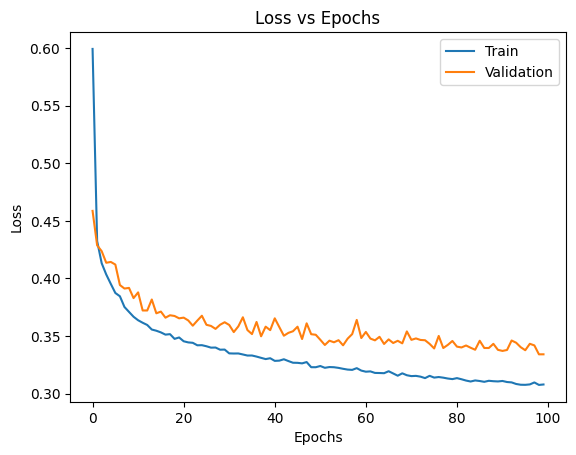

In [31]:
plt.plot(loss)

plt.plot(val_loss)

plt.title('Loss vs Epochs')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend(['Train', 'Validation'])


plt.show()

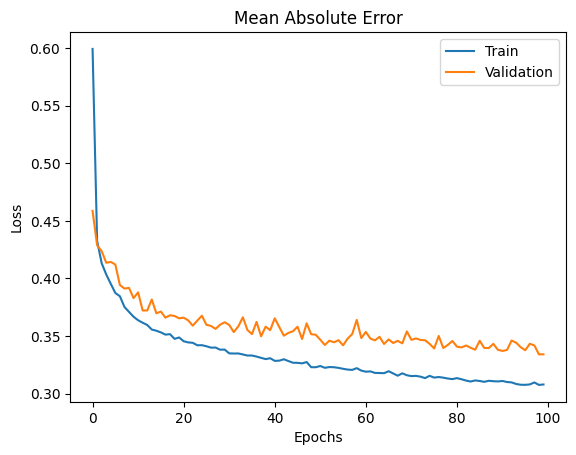

In [32]:
plt.plot(mae)

plt.plot(val_mae)


plt.title('Mean Absolute Error')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend(['Train', 'Validation'])


plt.show()

In [33]:
history_50_epochs = model.fit(X_train, y_train, epochs=50,  batch_size=32, validation_split=0.2, verbose=0)

In [34]:
loss,	mae,	val_loss,	val_mae = history_50_epochs.history['loss'], history_50_epochs.history['mae'], history_50_epochs.history['val_loss'], history_50_epochs.history['val_mae']

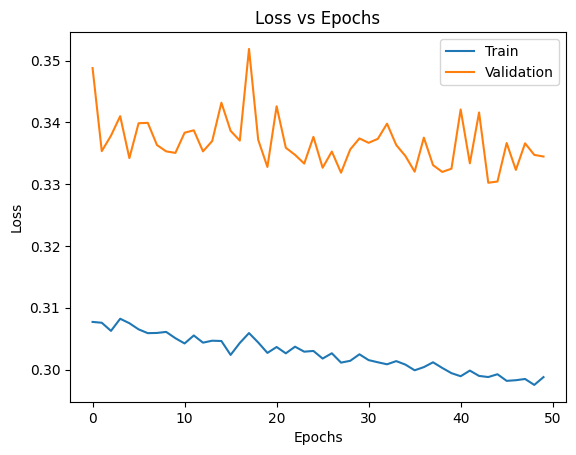

In [35]:
plt.plot(loss)

plt.plot(val_loss)

plt.title('Loss vs Epochs')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend(['Train', 'Validation'])


plt.show()

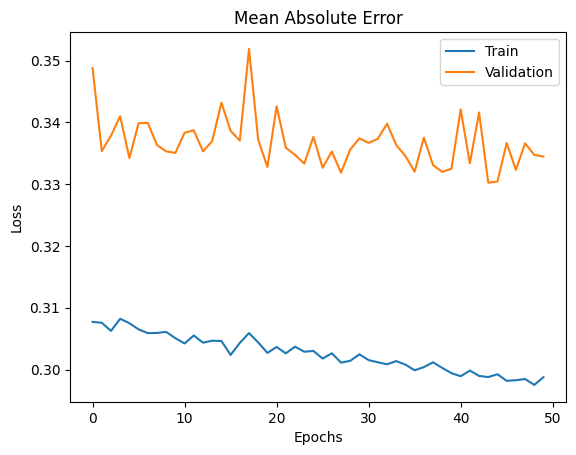

In [36]:
plt.plot(mae)

plt.plot(val_mae)


plt.title('Mean Absolute Error')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend(['Train', 'Validation'])